Useful functions to know for regression and data fitting:
*   `np.arange` to generate range of independent variable values
*   `np.column_stack` to build design matrix $X$
*   `np.lstsq` to solve the least-squares problem
*   `plt.scatter` and `plt.plot` to overlay fits on data

In [1]:
# Import the usual packages
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [2]:
# Example 1: Simple linear regression for time series
petrol = np.array([63122, 60953, 59551, 58785, 59795, 60083, 61819, 63107, 
                   64978, 66090, 66541, 67186, 67396, 67619, 69006, 70258, 
                   71880, 73597, 74274, 75975, 76928, 77732, 78457, 80089, 
                   83063, 84558, 85566, 86724, 86046, 84972, 88157, 89105, 
                   90340, 91195])
n = len(petrol)

# Form the design matrix with column of 1s and column of data
X = np.column_stack((np.ones(n), np.arange(n)))
print("X =", X)

X = [[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 25.]
 [ 1. 26.]
 [ 1. 27.]
 [ 1. 28.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 31.]
 [ 1. 32.]
 [ 1. 33.]]


beta = [56637.50084034  1032.57035905]
RMS =  [1731.90707671]


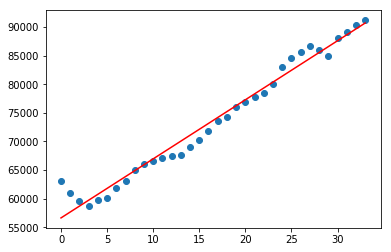

In [3]:
# Solve the least squares problem
sol = npl.lstsq(X, petrol, rcond=None)
beta = sol[0]
SSE = sol[1]

# Overlay trend line on data
plt.scatter(np.arange(n), petrol)
plt.plot(np.arange(n), X @ beta, 'r')
print("beta =", beta)
print("RMS = ", np.sqrt(SSE/n))

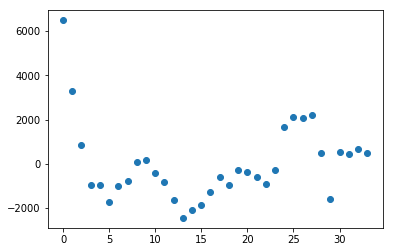

In [4]:
# Residual vector can be interpreted as de-trended time series
plt.scatter(np.arange(n), petrol - X @ beta)

beta = [ 0.13431967 -0.42955575]
RMS =  [0.19881595]
[ 0.181312    0.23422117  0.115667    0.29132667  0.33216936  0.0864536
  0.44997439  0.38820274  0.35336254  0.29711503  0.20804741  0.26851325
  0.16130819  0.40891918  0.47103277  0.38166678  0.41519299  0.40391163
  0.48967964  0.53724366  0.44186717  0.68300826  0.37918535  0.39688182
  0.34714722  0.61018423  0.37568982  0.43906117  0.56592428  0.40173391
  0.24239503  0.29424927  0.56743231  0.39560808  0.30590282  0.4874828
  0.42042694  0.35667218  0.39400117  0.35712554  0.22627341  0.24642881
  0.49245172  0.33523057  0.48071193  0.49763435  0.29688963  0.60367087
  0.23100541  0.38618394  0.25054151  0.44632366  0.5464478   0.59251295
  0.36776994  0.28437571  0.30054242  0.16027794  0.19120775  0.33001617
  0.2142009   0.16158709  0.31534182  0.08557263 -0.00131742  0.0544086
 -0.16464879 -0.00301362  0.08390397 -0.10559634  0.00450442 -0.21618706
 -0.13841376 -0.46513426 -0.36158607 -0.20922211 -0.09882597 -0.06474468
 

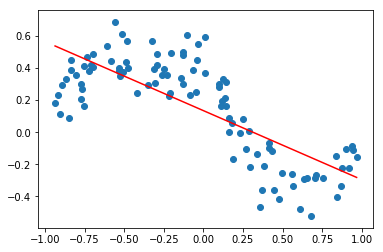

In [13]:
# Example 2: Polynomial fit

# Generate 100 training data in the interval [-1,1]
m = 100
x = 2*np.random.rand(m) - 1
x = np.sort(x,axis=0)
y = x**3 - x + 0.4/(1+25*x**2) + 0.1*np.random.randn(m)

# Simple linear fit (polynomial of degree 1)
X = np.column_stack((np.ones(m), x))
sol = npl.lstsq(X, y, rcond=None)
beta = sol[0]
SSE = sol[1]

plt.scatter(x,y)
plt.plot(x, X @ beta, 'r')
print("beta =", beta)
print("RMS = ", np.sqrt(SSE/m))
print(y)

beta = [ 0.19760167 -0.4530954  -0.29606596]
RMS =  [0.19109996]


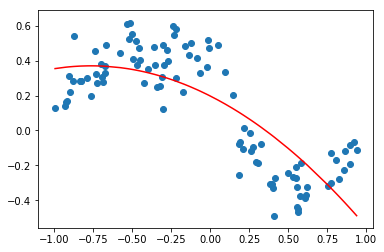

In [6]:
# Quadratic fit: fhat(x) = beta0 + beta1*x + beta2*x^2
X = np.column_stack((np.ones(m), x, np.power(x,2)))
sol = npl.lstsq(X, y, rcond=None)
beta = sol[0]
SSE = sol[1]

plt.scatter(x,y)
plt.plot(x, X @ beta, 'r')
print("beta =", beta)
print("RMS = ", np.sqrt(SSE/m))

beta = [ 0.29862034 -1.11737456 -1.93179954  1.59090842  4.02028313 -0.58964318
 -2.45716468]
RMS =  [0.11015664]


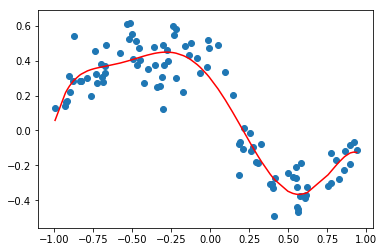

In [7]:
# Polynomial of degree 6: fhat(x) = beta0 + beta1*x + beta2*x^2 + beta3*x^3 
#                                   + beta4*x^4 + beta5*x^5 + beta6*x^6
X = np.column_stack((np.ones(m), x, np.power(x,2), np.power(x,3), 
                     np.power(x,4), np.power(x,5), np.power(x,6)))
sol = npl.lstsq(X, y, rcond=None)
beta = sol[0]
SSE = sol[1]

plt.scatter(x,y)
plt.plot(x, X @ beta, 'r')
print("beta =", beta)
print("RMS = ", np.sqrt(SSE/m))

Number of data = 120


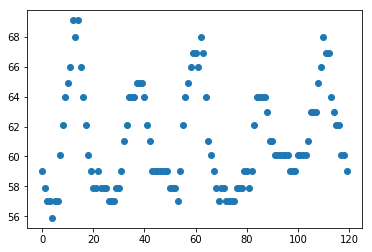

In [8]:
# Example 3: Auto-regressive time series
# zhat_{t+1} = theta_1 z_t + ... + theta_M z_{t-M+1}

temps = np.array([59. , 57.9, 57. , 57. , 55.9, 57. , 57. , 60.1, 62.1, 64. , 64.9,
       66. , 69.1, 68. , 69.1, 66. , 64. , 62.1, 60.1, 59. , 57.9, 57.9,
       59. , 57.9, 57.9, 57.9, 57. , 57. , 57. , 57.9, 57.9, 59. , 61. ,
       62.1, 64. , 64. , 64. , 64.9, 64.9, 64.9, 64. , 62.1, 61. , 59. ,
       59. , 59. , 59. , 59. , 59. , 59. , 57.9, 57.9, 57.9, 57. , 59. ,
       62.1, 64. , 64.9, 66. , 66.9, 66.9, 66. , 68. , 66.9, 64. , 61. ,
       60.1, 59. , 57.9, 57. , 57.9, 57.9, 57. , 57. , 57. , 57. , 57.9,
       57.9, 57.9, 59. , 59. , 57.9, 59. , 62.1, 64. , 64. , 64. , 64. ,
       63. , 61. , 61. , 60.1, 60.1, 60.1, 60.1, 60.1, 60.1, 59. , 59. ,
       59. , 60.1, 60.1, 60.1, 60.1, 61. , 63. , 63. , 63. , 64.9, 66. ,
       68. , 66.9, 66.9, 64. , 63. , 62.1, 62.1, 60.1, 60.1, 59. ])

N = len(temps)
plt.scatter(np.arange(N), temps)
print("Number of data =", N)

In [37]:
# Memory length of 8 looks decent
M = 8

# Observation vector y is just all observations except first M
y = temps[M:]

# Design matrix: Rows are observations 0:M, then 1:M+1, then 2:M+2, ...
# Alternatively, cols are observations 0:N-M, then 1:N-M+1, ..., M-1:N-1
X = np.column_stack((temps[0:N-M], temps[1:N-M+1], temps[2:N-M+2], temps[3:N-M+3], 
                     temps[4:N-M+4], temps[5:N-M+5], temps[6:N-M+6], temps[7:N-M+7]))
print("X =", X)
print(type(y))

X = [[59.  57.9 57.  57.  55.9 57.  57.  60.1]
 [57.9 57.  57.  55.9 57.  57.  60.1 62.1]
 [57.  57.  55.9 57.  57.  60.1 62.1 64. ]
 [57.  55.9 57.  57.  60.1 62.1 64.  64.9]
 [55.9 57.  57.  60.1 62.1 64.  64.9 66. ]
 [57.  57.  60.1 62.1 64.  64.9 66.  69.1]
 [57.  60.1 62.1 64.  64.9 66.  69.1 68. ]
 [60.1 62.1 64.  64.9 66.  69.1 68.  69.1]
 [62.1 64.  64.9 66.  69.1 68.  69.1 66. ]
 [64.  64.9 66.  69.1 68.  69.1 66.  64. ]
 [64.9 66.  69.1 68.  69.1 66.  64.  62.1]
 [66.  69.1 68.  69.1 66.  64.  62.1 60.1]
 [69.1 68.  69.1 66.  64.  62.1 60.1 59. ]
 [68.  69.1 66.  64.  62.1 60.1 59.  57.9]
 [69.1 66.  64.  62.1 60.1 59.  57.9 57.9]
 [66.  64.  62.1 60.1 59.  57.9 57.9 59. ]
 [64.  62.1 60.1 59.  57.9 57.9 59.  57.9]
 [62.1 60.1 59.  57.9 57.9 59.  57.9 57.9]
 [60.1 59.  57.9 57.9 59.  57.9 57.9 57.9]
 [59.  57.9 57.9 59.  57.9 57.9 57.9 57. ]
 [57.9 57.9 59.  57.9 57.9 57.9 57.  57. ]
 [57.9 59.  57.9 57.9 57.9 57.  57.  57. ]
 [59.  57.9 57.9 57.9 57.  57.  57.  57.9]
 [57.9 

In [10]:
# Inelegant solution (more practical for large M)
X = temps[0:N-M]
for i in range(M-1):
  X = np.column_stack((X, temps[i+1:N-M+i+1]))

# Better solution (no loop but less readable)
# mgrid returns a matrix with M identical columns of 0:N-M
# Add row-wise to this matrix a row with values 0:M
# Index temps with this "indexing matrix"
idx,_ = np.mgrid[0:N-M, 0:M] + np.arange(0,M)
X = temps[idx]
print(idx)
print("X =", X)

[[  0   1   2   3   4   5   6   7]
 [  1   2   3   4   5   6   7   8]
 [  2   3   4   5   6   7   8   9]
 [  3   4   5   6   7   8   9  10]
 [  4   5   6   7   8   9  10  11]
 [  5   6   7   8   9  10  11  12]
 [  6   7   8   9  10  11  12  13]
 [  7   8   9  10  11  12  13  14]
 [  8   9  10  11  12  13  14  15]
 [  9  10  11  12  13  14  15  16]
 [ 10  11  12  13  14  15  16  17]
 [ 11  12  13  14  15  16  17  18]
 [ 12  13  14  15  16  17  18  19]
 [ 13  14  15  16  17  18  19  20]
 [ 14  15  16  17  18  19  20  21]
 [ 15  16  17  18  19  20  21  22]
 [ 16  17  18  19  20  21  22  23]
 [ 17  18  19  20  21  22  23  24]
 [ 18  19  20  21  22  23  24  25]
 [ 19  20  21  22  23  24  25  26]
 [ 20  21  22  23  24  25  26  27]
 [ 21  22  23  24  25  26  27  28]
 [ 22  23  24  25  26  27  28  29]
 [ 23  24  25  26  27  28  29  30]
 [ 24  25  26  27  28  29  30  31]
 [ 25  26  27  28  29  30  31  32]
 [ 26  27  28  29  30  31  32  33]
 [ 27  28  29  30  31  32  33  34]
 [ 28  29  30  31  3

In [12]:
print(X)

[[59.  57.9 57.  57.  55.9 57.  57.  60.1]
 [57.9 57.  57.  55.9 57.  57.  60.1 62.1]
 [57.  57.  55.9 57.  57.  60.1 62.1 64. ]
 [57.  55.9 57.  57.  60.1 62.1 64.  64.9]
 [55.9 57.  57.  60.1 62.1 64.  64.9 66. ]
 [57.  57.  60.1 62.1 64.  64.9 66.  69.1]
 [57.  60.1 62.1 64.  64.9 66.  69.1 68. ]
 [60.1 62.1 64.  64.9 66.  69.1 68.  69.1]
 [62.1 64.  64.9 66.  69.1 68.  69.1 66. ]
 [64.  64.9 66.  69.1 68.  69.1 66.  64. ]
 [64.9 66.  69.1 68.  69.1 66.  64.  62.1]
 [66.  69.1 68.  69.1 66.  64.  62.1 60.1]
 [69.1 68.  69.1 66.  64.  62.1 60.1 59. ]
 [68.  69.1 66.  64.  62.1 60.1 59.  57.9]
 [69.1 66.  64.  62.1 60.1 59.  57.9 57.9]
 [66.  64.  62.1 60.1 59.  57.9 57.9 59. ]
 [64.  62.1 60.1 59.  57.9 57.9 59.  57.9]
 [62.1 60.1 59.  57.9 57.9 59.  57.9 57.9]
 [60.1 59.  57.9 57.9 59.  57.9 57.9 57.9]
 [59.  57.9 57.9 59.  57.9 57.9 57.9 57. ]
 [57.9 57.9 59.  57.9 57.9 57.9 57.  57. ]
 [57.9 59.  57.9 57.9 57.9 57.  57.  57. ]
 [59.  57.9 57.9 57.9 57.  57.  57.  57.9]
 [57.9 57.9

beta = [-0.02380284  0.2349011  -0.147789   -0.16962594  0.13558067 -0.22257999
 -0.15364252  1.34647982]
RMS =  [1.0694431]


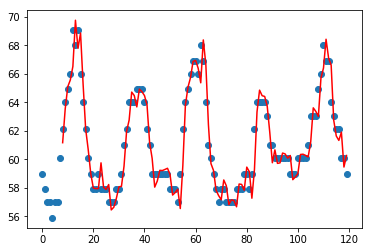

In [11]:
sol = npl.lstsq(X, y, rcond=None)
beta = sol[0]
SSE = sol[1]

plt.scatter(np.arange(N), temps)
plt.plot(np.arange(M,N), X @ beta, 'r')
print("beta =", beta)
print("RMS = ", np.sqrt(SSE/len(y)))

In [21]:
def reaction(t, reaction_change, M): # pass in an unsorted t, and then sort when its all done
    # given a current t 
    if reaction_change == 0:
        return sorted(t)
    elif reaction_change > 0: 
        ret = np.zeros(len(t)) # no reaction 
        ret[-(len(t)-2):] = t[:len(t)-2]
        return sorted(ret)
    else: # TODO: ACTUAL FORECASTING INTO THE FUTURE 
        # last element of the array 
        last = min(t)
        ret = np.ones(len(t))*last
        ret[:len(t)-2] = t[2:]
        N = len(t)
        idx,_ = np.mgrid[0:N-M, 0:M] + np.arange(0,M)
        X = temps[idx]
        sol = npl.lstsq(X, t, rcond=None)
        print(X)
        return sorted(ret)
    

SyntaxError: invalid character in identifier (<ipython-input-21-9215bd49ea1e>, line 19)

In [141]:
def reaction(t, reaction_change, M):
    if reaction_change == 0:
        return sorted(t)
    elif reaction_change > 0:
        ret = np.zeros(len(t))
        ret[-(len(t)-2):] = t[:len(t)-2]
        return sorted(ret)
    else:
        last = min(t)
        ret = np.ones(len(t))*last
        ret[:len(t)-2] = t[2:]
        N = len(t)
        y = t[M:]
        t_no = t
        t = np.array(t)
        idx,_ = np.mgrid[0:N-M, 0:M] + np.arange(0,M)
        X = t[idx]
        sol = npl.lstsq(X, y, rcond=None)
        sol = npl.lstsq(X, y, rcond=None)
        beta = np.array(sol[0])
        SSE = sol[1]
        plt.scatter(np.arange(N), t)
        plt.plot(np.arange(M,N), X @ beta, 'r')
        
        future = -1 * reaction_change
        predict = X @ beta
        x = np.array(t[-M:])
        
        
        for i in range(future):
            print(i)
            y = x @ beta
            #print("y:")
            #print(y)
            predict = np.append(predict, y)
            x = np.append(x, y)
            x = np.delete(x, 0)
            print(predict)
        print(np.arange(M, N+future))
       # print()
        print(len(np.arange(M, N+future)))
        print(len(predict))
        plt.plot(np.arange(M, N+future), predict)
        ret = t_no[-(len(t) + reaction_change):] + list(predict)
        print(ret)
        return(ret)

In [146]:
reaction([0,0,-1,-2,-1,-3,-5, -3, -3, -2, -1, 0, -2], 6, 7)

[-5.0, -3.0, -3.0, -3.0, -2.0, -2.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0]

In [143]:
cu_turnstile = [0.0, 174.0, 166.0, 1243.0, 2277.0, 2435.0, 1133.0, 139.0, 126.0, 1219.0, 1952.0, 1961.0, 577.0, 84.0, 411.0, 1820.0, 3646.0, 7496.0, 2673.0, 113.0, 440.0, 1876.0, 3558.0, 8042.0, 2400.0, 119.0, 476.0, 1857.0, 3484.0, 8036.0, 2510.0, 126.0, 444.0, 1932.0, 3509.0, 8043.0, 2636.0, 150.0, 421.0, 2280.0, 4129.0, 6428.0, 1717.0, 234.0, 152.0, 1249.0, 2652.0, 2776.0, 1097.0, 163.0, 109.0, 1049.0, 1946.0, 1788.0, 669.0, 102.0, 400.0, 1805.0, 3541.0, 7314.0, 2404.0, 107.0, 450.0, 1842.0, 3333.0, 7740.0, 2403.0, 132.0, 424.0, 1898.0, 3665.0, 8043.0, 2521.0, 106.0, 429.0, 2036.0, 3422.0, 7817.0, 2940.0, 131.0, 476.0, 2373.0, 3130.0, 6801.0, 1517.0, 188.0, 151.0, 1178.0, 2800.0, 2783.0, 1005.0, 166.0, 105.0, 940.0, 1887.0, 1983.0, 661.0, 90.0, 417.0, 1771.0, 3420.0, 7247.0, 2710.0, 106.0, 420.0, 1777.0, 3326.0, 7788.0, 2655.0, 121.0, 458.0, 1801.0, 3658.0, 7797.0, 2680.0, 133.0, 454.0, 2042.0, 3660.0, 7609.0, 2864.0, 145.0, 436.0, 2261.0, 4244.0, 6370.0, 1515.0, 127.0, 127.0, 1006.0, 2340.0, 2442.0, 1080.0, 156.0, 108.0, 885.0, 1808.0, 1882.0, 639.0, 115.0, 162.0, 1120.0, 2575.0, 5661.0, 1925.0, 136.0, 306.0, 1649.0, 3396.0, 7440.0, 2384.0, 143.0, 343.0, 1885.0, 3413.0, 7779.0, 2692.0, 123.0, 365.0, 1884.0, 3636.0, 7615.0, 2674.0, 155.0, 384.0, 2290.0, 4364.0, 6678.0, 1785.0, 205.0, 129.0, 1066.0, 2483.0, 2356.0, 1395.0, 139.0, 112.0, 903.0, 1720.0, 1839.0, 698.0, 83.0, 439.0, 1802.0, 3256.0, 7059.0, 2314.0, 117.0, 457.0, 1842.0, 3501.0, 7672.0, 2443.0, 127.0, 483.0, 1922.0, 3525.0, 7704.0, 2530.0, 130.0, 443.0, 1960.0, 3597.0, 7934.0, 2636.0, 129.0, 461.0, 2308.0, 4230.0, 6385.0, 2157.0, 178.0, 153.0, 1178.0, 2462.0, 2644.0, 1530.0, 199.0, 113.0, 930.0, 1794.0, 1701.0, 626.0, 80.0, 432.0, 1682.0, 3266.0, 6761.0, 2247.0, 142.0, 448.0, 1733.0, 3540.0, 7233.0, 2329.0, 136.0, 450.0, 1783.0, 3405.0, 7221.0, 2231.0, 132.0, 469.0, 1856.0, 3261.0, 7047.0, 2391.0, 166.0, 432.0, 1983.0, 3903.0, 5957.0, 1726.0, 169.0, 164.0, 1025.0, 2083.0, 2410.0, 1047.0, 170.0, 221.0, 954.0, 1554.0, 1173.0, 517.0, 61.0, 759.0, 1259.0, 3032.0, 3370.0, 682.0, 47.0, 740.0, 1218.0, 2883.0, 3375.0, 593.0, 44.0, 728.0, 1086.0, 2701.0, 3347.0, 594.0, 40.0, 620.0, 970.0, 2357.0, 2632.0, 434.0, 42.0, 525.0, 815.0, 2042.0, 1748.0, 341.0, 39.0, 170.0, 376.0, 637.0, 477.0, 230.0, 23.0, 112.0, 252.0, 450.0, 378.0, 162.0, 23.0, 210.0, 430.0, 1211.0, 748.0, 200.0, 17.0, 177.0, 283.0, 971.0, 607.0, 182.0, 19.0, 159.0, 238.0, 854.0, 498.0, 160.0, 13.0, 169.0, 199.0, 701.0, 449.0, 153.0, 16.0, 132.0, 194.0, 611.0, 403.0, 128.0, 17.0, 82.0, 66.0, 199.0, 160.0, 75.0, 13.0, 83.0, 62.0, 148.0, 123.0, 66.0, 12.0, 107.0, 118.0, 403.0, 220.0, 109.0, 11.0, 112.0, 83.0, 377.0, 242.0, 115.0, 9.0, 111.0, 63.0, 361.0, 212.0, 112.0, 8.0, 109.0, 67.0, 373.0, 208.0, 112.0, 6.0, 80.0, 83.0, 329.0, 208.0, 95.0, 7.0, 73.0, 39.0, 114.0, 75.0, 56.0, 11.0, 73.0, 35.0, 97.0, 69.0, 60.0, 11.0, 92.0, 49.0, 267.0, 172.0, 86.0, 9.0, 84.0, 42.0, 274.0, 157.0, 88.0, 9.0, 92.0, 41.0, 277.0, 158.0, 74.0, 2.0, 87.0, 41.0, 248.0, 176.0, 81.0, 5.0, 87.0, 50.0, 242.0, 147.0, 75.0, 5.0, 56.0, 27.0, 88.0, 70.0, 50.0, 6.0, 73.0, 20.0, 87.0, 66.0, 44.0, 8.0, 82.0, 44.0, 224.0, 157.0, 79.0, 5.0, 94.0, 35.0, 243.0, 143.0, 72.0, 6.0, 89.0, 39.0, 245.0, 119.0, 82.0, 9.0, 80.0, 52.0, 233.0, 131.0, 71.0, 4.0, 91.0, 45.0, 204.0, 128.0, 79.0, 6.0, 72.0, 29.0, 80.0, 79.0, 57.0, 5.0, 57.0, 16.0, 73.0, 67.0, 42.0, 6.0, 80.0, 34.0, 218.0, 124.0, 64.0, 7.0, 80.0, 36.0, 228.0, 136.0, 81.0, 5.0, 90.0, 42.0, 251.0, 138.0, 69.0, 4.0, 88.0, 44.0, 276.0, 134.0, 67.0, 6.0, 86.0, 53.0, 229.0, 139.0]

0
[ 3.14372172e+03  6.57555671e+03  2.41840088e+03  4.28067986e+02
  5.05956456e+02  1.70522805e+03  3.48435697e+03  7.66064093e+03
  2.72189625e+03  7.85276449e+01  4.84155191e+02  1.74992004e+03
  3.62792130e+03  7.72135708e+03  2.50767660e+03  1.52830758e+02
  4.64062016e+02  1.91869512e+03  3.36235677e+03  7.87103447e+03
  2.87980884e+03  1.88170894e+02  4.61598890e+02  2.11846946e+03
  3.95122023e+03  6.49629995e+03  1.64250648e+03 -2.48373495e+01
  3.87117744e+01  1.46698316e+03  2.73592434e+03  2.53965651e+03
  7.70965044e+02  2.69540165e+02  3.31235234e+02  7.11448161e+02
  1.94120261e+03  1.86512515e+03  9.04626209e+02 -4.46130653e+00
  2.77999786e+02  1.47388538e+03  2.93890773e+03  5.80016010e+03
  1.92617535e+03  7.41007916e+01  3.22605117e+02  1.10580844e+03
  2.91054289e+03  6.74879923e+03  2.69097496e+03  1.79180820e+02
  1.60730225e+02  1.86652701e+03  3.56047667e+03  7.32722879e+03
  2.52465651e+03  2.12242645e+02  3.95881702e+02  2.01125859e+03
  3.37176943e+03  7.249

[2404.0,
 107.0,
 450.0,
 1842.0,
 3333.0,
 7740.0,
 2403.0,
 132.0,
 424.0,
 1898.0,
 3665.0,
 8043.0,
 2521.0,
 106.0,
 429.0,
 2036.0,
 3422.0,
 7817.0,
 2940.0,
 131.0,
 476.0,
 2373.0,
 3130.0,
 6801.0,
 1517.0,
 188.0,
 151.0,
 1178.0,
 2800.0,
 2783.0,
 1005.0,
 166.0,
 105.0,
 940.0,
 1887.0,
 1983.0,
 661.0,
 90.0,
 417.0,
 1771.0,
 3420.0,
 7247.0,
 2710.0,
 106.0,
 420.0,
 1777.0,
 3326.0,
 7788.0,
 2655.0,
 121.0,
 458.0,
 1801.0,
 3658.0,
 7797.0,
 2680.0,
 133.0,
 454.0,
 2042.0,
 3660.0,
 7609.0,
 2864.0,
 145.0,
 436.0,
 2261.0,
 4244.0,
 6370.0,
 1515.0,
 127.0,
 127.0,
 1006.0,
 2340.0,
 2442.0,
 1080.0,
 156.0,
 108.0,
 885.0,
 1808.0,
 1882.0,
 639.0,
 115.0,
 162.0,
 1120.0,
 2575.0,
 5661.0,
 1925.0,
 136.0,
 306.0,
 1649.0,
 3396.0,
 7440.0,
 2384.0,
 143.0,
 343.0,
 1885.0,
 3413.0,
 7779.0,
 2692.0,
 123.0,
 365.0,
 1884.0,
 3636.0,
 7615.0,
 2674.0,
 155.0,
 384.0,
 2290.0,
 4364.0,
 6678.0,
 1785.0,
 205.0,
 129.0,
 1066.0,
 2483.0,
 2356.0,
 1395.0,
 139.0,


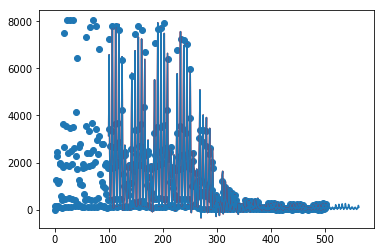

In [144]:
reaction(cu_turnstile, -60, 100)

0
[ 12.90211125   8.67539671  13.27062606   7.86336277   3.8560525
   4.57213218  11.77445637   6.76563322  18.94355237  22.32259121
  10.97304139   7.66656333   3.79294922   2.47012916   9.99324214
  25.11376115  19.85835374  14.45436006   8.18200188  12.87456011
  14.91200109  17.85537113  28.12708088  24.99428126  13.69844553
  13.83869799  12.13561176   7.77554732   3.38668019   7.1326321
  -4.05693095  -4.41676144  -4.15352349  -5.52215047 -12.84226085
 -18.18414798 -18.78768298 -24.03041163 -22.29394363 -16.30208795
 -15.96723136 -22.37062919 -29.47436007 -33.84455446 -38.27381323
 -32.46173568 -27.2668371  -26.8231802  -28.57968714 -38.86302997]
1
[ 12.90211125   8.67539671  13.27062606   7.86336277   3.8560525
   4.57213218  11.77445637   6.76563322  18.94355237  22.32259121
  10.97304139   7.66656333   3.79294922   2.47012916   9.99324214
  25.11376115  19.85835374  14.45436006   8.18200188  12.87456011
  14.91200109  17.85537113  28.12708088  24.99428126  13.69844553
  13.838

[8.0,
 4.0,
 18.0,
 4.0,
 19.0,
 1.0,
 2.0,
 8.0,
 7.0,
 9.0,
 16.0,
 36.0,
 3.0,
 6.0,
 2.0,
 4.0,
 10.0,
 14.0,
 30.0,
 8.0,
 10.0,
 20.0,
 17.0,
 19.0,
 21.0,
 35.0,
 5.0,
 10.0,
 10.0,
 2.0,
 -7.0,
 -11.0,
 -3.0,
 -13.0,
 -11.0,
 -9.0,
 -16.0,
 -20.0,
 -27.0,
 -24.0,
 -24.0,
 -16.0,
 -15.0,
 -26.0,
 -28.0,
 -36.0,
 -39.0,
 -34.0,
 -29.0,
 -23.0,
 -30.0,
 -40.0,
 12.902111248285891,
 8.675396710280005,
 13.270626057582692,
 7.863362769134582,
 3.856052504933407,
 4.572132179064071,
 11.774456366921243,
 6.7656332213869295,
 18.943552372428734,
 22.322591205210735,
 10.9730413916326,
 7.666563327927339,
 3.7929492197246493,
 2.4701291566306796,
 9.993242143355804,
 25.113761146445576,
 19.85835373634588,
 14.454360063957987,
 8.182001877060403,
 12.874560111135104,
 14.91200108807049,
 17.855371134729822,
 28.127080878474295,
 24.994281262393226,
 13.6984455346628,
 13.838697990577884,
 12.135611763794508,
 7.775547316142504,
 3.386680192143734,
 7.132632095241849,
 -4.05693095052090

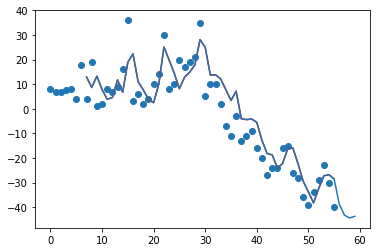

In [145]:
stop = [8.0, 7.0, 7.0, 7.5, 8.0, 4.0, 18.0, 4.0, 19.0, 1.0, 2.0, 8.0, 7.0, 9.0, 16.0, 36.0, 3.0, 6.0, 2.0, 4.0, 10.0, 14.0, 30.0, 8.0, 10.0, 20.0, 17.0, 19.0, 21.0, 35.0, 5.0, 10.0, 10.0, 2.0, -7.0, -11.0, -3.0, -13.0, -11.0, -9.0, -16.0, -20.0, -27.0, -24.0, -24.0, -16.0, -15.0, -26.0, -28.0, -36.0, -39.0, -34.0, -29.0, -23.0, -30.0, -40.0]
reaction(stop, -4, 7)